<a href="https://colab.research.google.com/github/abdulwasaeee/Linear-Regression/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm

In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df=df.drop(columns=["Unnamed: 0","year","month"],axis=1)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


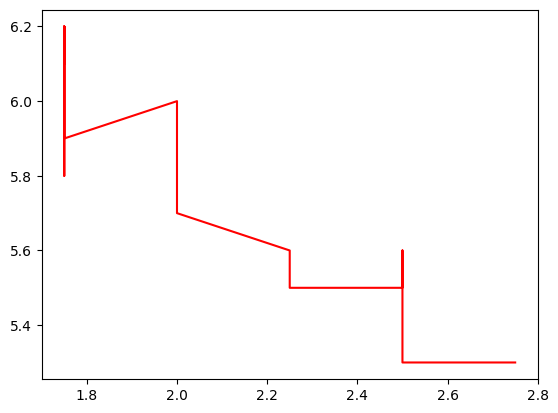

In [7]:
plt.plot(df["interest_rate"],df['unemployment_rate'],color='r')

In [8]:
x=df[["interest_rate","unemployment_rate"]]

In [9]:
y=df["index_price"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

<Axes: xlabel='interest_rate', ylabel='index_price'>

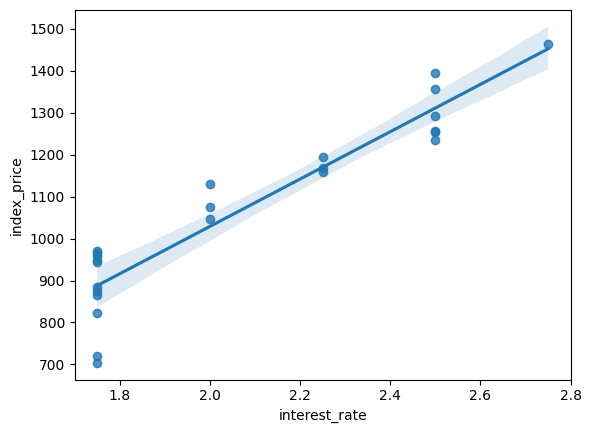

In [11]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

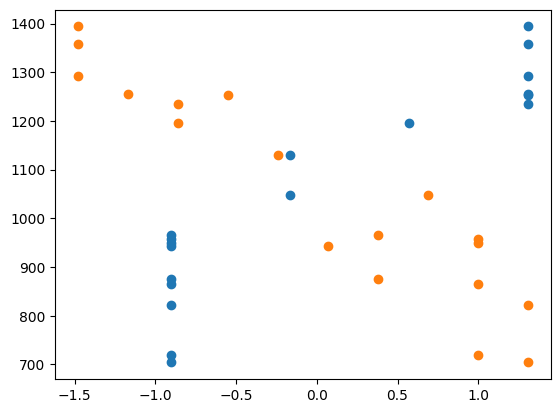

In [49]:
plt.scatter(x_train[:,0],y_train)
plt.scatter(x_train[:,1],y_train)


In [15]:
validation_score=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [16]:
np.mean(validation_score)      #cross-validation value

np.float64(-5914.828180162386)

In [17]:
y_pred=lr.predict(x_test)

In [19]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [18]:

mse=mean_squared_error(y_test,y_pred)    #performance metrics
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adjustedr2=1-((1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print(mse,mae,rmse,r2,adjustedr2)

5793.762887712569 59.935781523235484 76.11677139574805 0.8278978091457145 0.8049508503651431


In [28]:
x2=sm.add_constant(x_train)

In [29]:
model=sm.OLS(y_train,x2).fit()

In [30]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.50e-08
Time:                        15:17:18   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.000    1017.336    1089.553
x1            88.2728     42.263      2.089      0.054      -1.810     178.355
x2          -116.2572     42.263     -2.751      0.015    -206.340     -26.175
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lr.intercept_

np.float64(1053.4444444444443)

In [27]:
lr.coef_

array([  88.27275507, -116.25716066])

In [33]:

lr.predict(scaler.transform([[2.75,5.3]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1406.51300368])

In [38]:
predvalue=scaler.transform(np.array([[2.75,5.3]]))
predvalue=sm.add_constant(predvalue,has_constant='add')
model.predict(predvalue)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1406.51300368])